In [2]:
import re
import pandas as pd 

### Databse Description

In [5]:
# Charger le fichier CSV en spécifiant les guillemets
data = pd.read_excel('DB.xlsx')

# Vérifier les colonnes disponibles
print("Colonnes disponibles :", data.columns) 

Colonnes disponibles : Index(['Line', 'Category'], dtype='object')


In [6]:
# afficher la Taille des données
data_shape = data.shape
print(f"Taille des données : {data_shape[0]} lignes et {data_shape[1]} colonnes") 

Taille des données : 5071 lignes et 2 colonnes


In [7]:
# Renommer les colonnes 'Category' et 'texte'
data.columns = ['texte','catégorie']
# afficher les Attributs
attributes = data.columns.tolist()
print("Attributs :", attributes)

Attributs : ['texte', 'catégorie']


In [8]:
# Afficher les Classes et leurs distributions
if 'catégorie' in data.columns:
    class_distribution = data['catégorie'].value_counts()
    print("Distribution des classes :")
    print(class_distribution)
else:
    print("Aucune colonne 'catégorie' trouvée.")

# 4. Nombre de classes
if 'catégorie' in data.columns:
    num_classes = data['catégorie'].nunique()
    print(f"Nombre de classes : {num_classes}")
else:
    print("Aucune colonne 'catégorie' trouvée.")

Distribution des classes :
catégorie
الإعراض عن الجاهلين    515
التأني الأناة          312
البر                   223
الاعتدال والوسطية      211
البشاشة                209
                      ... 
رفع الصوت                1
الإطراء والمدح           1
النزاهة                  1
الجبن                    1
 حسن السمت               1
Name: count, Length: 131, dtype: int64
Nombre de classes : 131


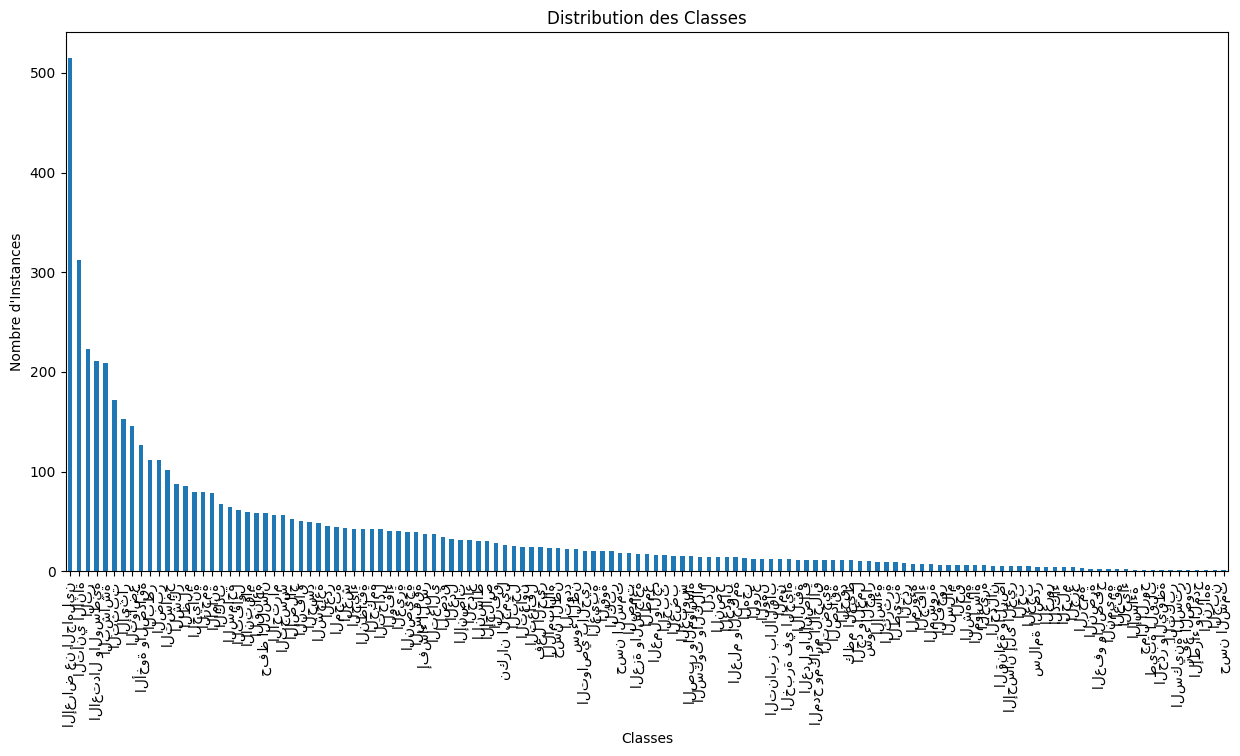

In [9]:
import matplotlib.pyplot as plt

# Visualisation de la distribution des classes
class_distribution.plot(kind='bar', figsize=(15, 7))
plt.title("Distribution des Classes")
plt.xlabel("Classes")
plt.ylabel("Nombre d'Instances")
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

### Etude spécifique des classes minoritaires

### 1/Ratio

In [10]:
# Calcul du ratio de déséquilibre
majority_class_count = class_distribution.max()
minority_class_count = class_distribution.min()
ratio = majority_class_count / minority_class_count
print(f"Ratio de déséquilibre des classes : {ratio}") 

Ratio de déséquilibre des classes : 515.0


* Résultat: signifie que la classe majoritaire est 515 fois plus fréquente que la classe minoritaire.

* Interprétation: Un ratio aussi élevé indique un déséquilibre extrême dans la distribution des classes

Cela peut poser des problèmes pour les modèles d'apprentissage automatique, car ils risquent de favoriser fortement la classe majoritaire et de négliger la classe minoritaire.

### 2/L'écart Type

In [12]:
# Calcul de l'écart entre la classe majoritaire et minoritaire
class_diff = majority_class_count - minority_class_count
print(f"Écart absolu entre la classe majoritaire et la minoritaire : {class_diff}")

Écart absolu entre la classe majoritaire et la minoritaire : 514


* Résultat: class_diff = 514, ce qui montre que la classe majoritaire compte 514 instances de plus que la classe minoritaire.

* Interprétation: Un écart aussi important confirme encore une fois le déséquilibre des classes.

### 3/Distribution des classes Minoritaires

### 3.1/ Moyenne de la distribution des classes

La moyenne de distribution représente la fréquence moyenne d'apparition des classes dans votre jeu de données.

In [15]:
# calculer la moyenne de la distribution des classes
mean_distribution = class_distribution.mean()
print('mean_distribution: ',mean_distribution)

mean_distribution:  38.70992366412214


Résultat: Cela signifie que, en moyenne, chaque classe contient environ 169 instances.

Interprétation: Si certaines classes sont significativement au-dessus ou en dessous de cette moyenne, cela indique un déséquilibre dans la distribution des classes.

### 3.2/Visualisation des Classes Minoritaires : Analyse de la Distribution Sous le Seuil de Fréquence

In [17]:
threshold = mean_distribution * 0.5  # Ajustez ici si nécessaire
print(f"Moyenne des distributions : {mean_distribution}")
print(f"Seuil utilisé (50% de la moyenne) : {threshold}")

Moyenne des distributions : 38.70992366412214
Seuil utilisé (50% de la moyenne) : 19.35496183206107


In [18]:
# Afficher les classes proches du seuil
close_to_threshold = class_distribution[
    (class_distribution >= threshold * 0.9) & (class_distribution < threshold)
]
print("Classes proches du seuil :")
print(close_to_threshold)

Classes proches du seuil :
catégorie
حسن السمت    18
الصمت        18
Name: count, dtype: int64
